# Data Preprocessing 

## 1. Data Intake

### 1.1. Load Dataset

In [331]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [332]:
file_path = "../data/online_retail_II.csv"

# Load dataset and convert invoice date
df = pd.read_csv(file_path)
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


### 1.2. Basic data inspectation

In [335]:
print(df.dtypes)
print('------------------------')
df.info()

Invoice         object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
Price          float64
Customer ID    float64
Country         object
dtype: object
------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1067371 non-null  object 
 1   StockCode    1067371 non-null  object 
 2   Description  1062989 non-null  object 
 3   Quantity     1067371 non-null  int64  
 4   InvoiceDate  1067371 non-null  object 
 5   Price        1067371 non-null  float64
 6   Customer ID  824364 non-null   float64
 7   Country      1067371 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 65.1+ MB


Large amount of missing values in columns `Customer ID`, some missing values in column `Description`

#### 0 Invoice

In [338]:
df.Invoice.nunique()

53628

Represents a unique 5-digit invoice identifier. We’ll validate the data to identify any entries that don’t match this pattern.

In [340]:
# Check what invoices do not follow the 5-digit pattern
noisy_invoices = df[~df.Invoice.str.match('\d{5}')]
noisy_invoices

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.0,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.0,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.0,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
...,...,...,...,...,...,...,...,...
1065910,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
1067002,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
1067176,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
1067177,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


Invoices prefixed with ‘C’ indicate cancelled orders. These will be excluded from clustering and subsequently removed from the dataset.

#### 1 StockCode

In [343]:
df.StockCode.nunique()

5305

Represents a unique 5-digit product identifier, often followed by a one-letter color suffix. We’ll examine the data for any additional inconsistent or noisy patterns.

In [346]:
# Check what stock codes do not follow the 5-digit pattern
noisy_stock_codes = df[~df.StockCode.str.match('\d{5}')]
noisy_stock_codes

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
89,489439,POST,POSTAGE,3,2009-12-01 09:28:00,18.00,12682.0,France
126,489444,POST,POSTAGE,1,2009-12-01 09:55:00,141.00,12636.0,USA
173,489447,POST,POSTAGE,1,2009-12-01 10:10:00,130.00,12362.0,Belgium
625,489526,POST,POSTAGE,6,2009-12-01 11:50:00,18.00,12533.0,Germany
735,C489535,D,Discount,-1,2009-12-01 12:11:00,9.00,15299.0,United Kingdom
...,...,...,...,...,...,...,...,...
1067002,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
1067191,581570,POST,POSTAGE,1,2011-12-09 11:59:00,18.00,12662.0,Germany
1067228,581574,POST,POSTAGE,2,2011-12-09 12:09:00,18.00,12526.0,Germany
1067229,581578,POST,POSTAGE,3,2011-12-09 12:16:00,18.00,12713.0,Germany


Over 6,000 codes don’t match the expected regex, suggesting multiple subpatterns. We’ll inspect their unique values to better understand these variations.

In [352]:
noisy_stock_codes.StockCode.unique()

array(['POST', 'D', 'DCGS0058', 'DCGS0068', 'DOT', 'M', 'DCGS0004',
       'DCGS0076', 'C2', 'BANK CHARGES', 'DCGS0003', 'TEST001',
       'gift_0001_80', 'DCGS0072', 'gift_0001_20', 'DCGS0044', 'TEST002',
       'gift_0001_10', 'gift_0001_50', 'DCGS0066N', 'gift_0001_30',
       'PADS', 'ADJUST', 'gift_0001_40', 'gift_0001_60', 'gift_0001_70',
       'gift_0001_90', 'DCGSSGIRL', 'DCGS0006', 'DCGS0016', 'DCGS0027',
       'DCGS0036', 'DCGS0039', 'DCGS0060', 'DCGS0056', 'DCGS0059', 'GIFT',
       'DCGSLBOY', 'm', 'DCGS0053', 'DCGS0062', 'DCGS0037', 'DCGSSBOY',
       'DCGSLGIRL', 'S', 'DCGS0069', 'DCGS0070', 'DCGS0075', 'B',
       'DCGS0041', 'ADJUST2', 'C3', 'SP1002', 'AMAZONFEE', 'DCGS0055',
       'DCGS0074', 'DCGS0057', 'DCGS0073', 'DCGS0071', 'DCGS0066P',
       'DCGS0067', 'CRUK'], dtype=object)

The most irregular patterns correspond to gift or promotional items, administrative or financial entries, and test or placeholder records - all irrelevant for this analysis. Only the 'DCGS' pattern will be retained, as it should represent themed or set products.

In [354]:
stockcode_pattern_to_keep = '\d{5}|DCGS'

#### 3 Quantity 

Must be positive to hold value. We’ll identify and review entries with non-positive quantities.

In [360]:
df[df.Quantity < 0]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.0,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.0,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.0,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
...,...,...,...,...,...,...,...,...
1065910,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
1067002,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
1067176,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
1067177,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


In [362]:
df[df.Quantity == 0]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country


Transactions with negative quantities indicate refunds. Since clustering will use gross monetary values, these records will be excluded from the dataset.

#### 4 InvoiceDate
Contains no missing values, so no data quality inspection is needed. However, it will be converted to a proper datetime format

#### 5 Price
Follows the same logic as Quantity -- only positive values are meaningful. We’ll check for zero or negative prices, which typically indicate data entry errors, refunds, or non-sales items. Such records will be excluded to ensure accurate monetary and clustering analysis

In [367]:
df[df.Price < 0]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
179403,A506401,B,Adjust bad debt,1,2010-04-29 13:36:00,-53594.36,NaN,United Kingdom
276274,A516228,B,Adjust bad debt,1,2010-07-19 11:24:00,-44031.79,NaN,United Kingdom
403472,A528059,B,Adjust bad debt,1,2010-10-20 12:04:00,-38925.87,NaN,United Kingdom
825444,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom
825445,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom


In [369]:
df[df.Price == 0]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
263,489464,21733,85123a mixed,-96,2009-12-01 10:52:00,0.0,NaN,United Kingdom
283,489463,71477,short,-240,2009-12-01 10:52:00,0.0,NaN,United Kingdom
284,489467,85123A,21733 mixed,-192,2009-12-01 10:53:00,0.0,NaN,United Kingdom
470,489521,21646,NaN,-50,2009-12-01 11:44:00,0.0,NaN,United Kingdom
3114,489655,20683,NaN,-44,2009-12-01 17:26:00,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
1062442,581234,72817,NaN,27,2011-12-08 10:33:00,0.0,NaN,United Kingdom
1063965,581406,46000M,POLYESTER FILLER PAD 45x45cm,240,2011-12-08 13:58:00,0.0,NaN,United Kingdom
1063966,581406,46000S,POLYESTER FILLER PAD 40x40cm,300,2011-12-08 13:58:00,0.0,NaN,United Kingdom
1064015,581408,85175,NaN,20,2011-12-08 14:06:00,0.0,NaN,United Kingdom


Records with zero or negative prices lack CustomerID, confirming they're internal or administrative and should be removed.

#### 6 Customer ID

Represents a unique 5-digit customer identifier stored as a float due to missing values (`NaN` has `float64` dtype).

The column contains numerous missing values, likely corresponding to non–customer-related records. These rows will be removed to retain only relevant customer data.

In [374]:
print(df['Customer ID'].nunique())

5942


Approximately 6,000 unique customers will be analyzed. 

The records must be validated to confirm all identifiers adhere to the expected pattern.

In [377]:
assert (df['Customer ID'].dropna() < 100000).all()

### 1.3. Conclusion



- Columns Description and Country were excluded from inspection, as they are not relevant to the analysis.

### Summary of Basic Data Inspection

* **Invoice** – Represents a unique 5-digit invoice number with no missing values. Around **19,500 records** are marked as cancelled (prefix **'C'**), which are not relevant for behavioral analysis and will be **removed**.

* **StockCode** – Represents a product code with no missing values. Over **6,000 irregular codes** deviate from the expected 5-digit pattern, primarily representing gifts, administrative, or test items. Only 5-digit codes and those with the **'DCGS'** prefix (themed/set items) will be retained.

* **Description** – Text description of products. Contains missing values and does not contribute to RFM or customer segmentation. Since it does not contribute to behavioral or RFM parameters, it **does not contribute to customer analysis**.

* **Quantity** – Number of units sold per transaction, with no missing values. Negative quantities correspond to refunds and will be **excluded**, as only positive quantities contribute to gross monetary value calculations used for clustering.

* **InvoiceDate** – Timestamp of the transaction, complete with no missing values. Will be **converted to datetime format**, and **Year**, **Month**, and **Day** will be extracted to support temporal segmentation and recency analysis in the RFM model.

* **Price** – Unit price of each product. Zero or negative prices typically represent internal or accounting adjustments and are **not relevant for customer analysis**. These records will be **removed** to ensure accuracy in monetary metrics.

* **CustomerID** – Unique 5-digit identifier stored as `float64` due to missing (`NaN`) entries. Roughly **20%** of records lack a customer ID, indicating non-customer-related transactions. These rows will be **removed**, and the column will be **converted to string** type for consistency. After cleaning, the dataset will represent approximately **6,000 unique customers**.

* **Country** – Location of the transaction, with no missing values. Since it does not contribute to behavioral or RFM parameters, it **does not contribute to customer analysis**.

**In summary**, the dataset will be refined to include only relevant, customer-related transactions with accurate monetary and temporal information—forming a clean foundation for segmentation and RFM-based analysis.

## 2. Data Cleaning 

All column names will be converted to **snake_case** for consistency and easier handling in analysis.

In [264]:
df.columns = (
    df.columns
      .str.strip()                 # remove extra spaces
      .str.replace(r'\s+', '_', regex=True)  # spaces → underscores
      .str.replace('-', '_', regex=False)     # dashes → underscores
      .str.lower()                 # lowercase
)

df.columns 

Index(['invoice', 'stockcode', 'description', 'quantity', 'invoicedate',
       'price', 'customer_id', 'country'],
      dtype='object')

In [266]:
# Additional formatting needed
df.rename(columns = {
    'invoice' : 'invoice_no',
    'stockcode': 'stock_code',
    'invoicedate': 'invoice_date',
    'price': 'unit_price',
}, inplace = True)

df.columns 

Index(['invoice_no', 'stock_code', 'description', 'quantity', 'invoice_date',
       'unit_price', 'customer_id', 'country'],
      dtype='object')

### 2.2. Handle duplicated data and missing values

First, remove duplicate rows while excluding `Description`, as product descriptions may have changed over time.

In [387]:
# Remove duplicated rows based 
subset = list(df.columns)
subset.remove('Description')
df = df.drop_duplicates(subset = subset)
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


Missing descriptions are acceptable since the column isn’t used for segmentation. However, transactions without a `Customer ID` will be removed, as the analysis focuses on customer behavior.

In [412]:
df.dropna(subset = ['Customer ID'], inplace = True)

### 2.3. Handle Noisy Data

Exclude cancelled invoices (`Invoice` starting with **'C'**) to drop credit notes/reversals.

In [418]:
cancelled_transactions = df[df['Invoice'].str.startswith('C', na=False)]
df = df.drop(index = cancelled_transactions.index)
df.shape

(779493, 8)

Next, remove all transactions with non-positive **quantity** or **price**, as they hold no analytical value.

In [421]:
valueless_transactions = df[(df['Quantity'] * df['Price'] <= 0)]
df.drop(index = valueless_transactions.index, inplace = True)
df.shape

(779423, 8)

In [429]:
df = df[df['StockCode'].str.match(stockcode_pattern_to_keep)] 
df.shape

(776575, 8)

### 2.4. Feature Formatting
Convert `InvoiceDate` to `datetime` and cast `Customer ID` to string for consistent data typing.

In [436]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['InvoiceDate']

0         2009-12-01 07:45:00
1         2009-12-01 07:45:00
2         2009-12-01 07:45:00
3         2009-12-01 07:45:00
4         2009-12-01 07:45:00
                  ...        
1067365   2011-12-09 12:50:00
1067366   2011-12-09 12:50:00
1067367   2011-12-09 12:50:00
1067368   2011-12-09 12:50:00
1067369   2011-12-09 12:50:00
Name: InvoiceDate, Length: 776575, dtype: datetime64[ns]

In [438]:
df['Customer ID'] = df['Customer ID'].astype(int).astype(str) # Wrap to int in order to drop ".0"
df['Customer ID']

0          13085
1          13085
2          13085
3          13085
4          13085
           ...  
1067365    12680
1067366    12680
1067367    12680
1067368    12680
1067369    12680
Name: Customer ID, Length: 776575, dtype: object

### 2.5. Outlier Handling 

To identify potential outliers, visually inspect the numeric features — `Quantity` and `Price`.


In [453]:
num_cols = ['Quantity', 'Price']

In [455]:
df[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,776575.0,13.518887,146.096521,1.00,2.00,6.00,12.00,80995.0
Price,776575.0,2.934560,4.293615,0.03,1.25,1.95,3.75,649.5


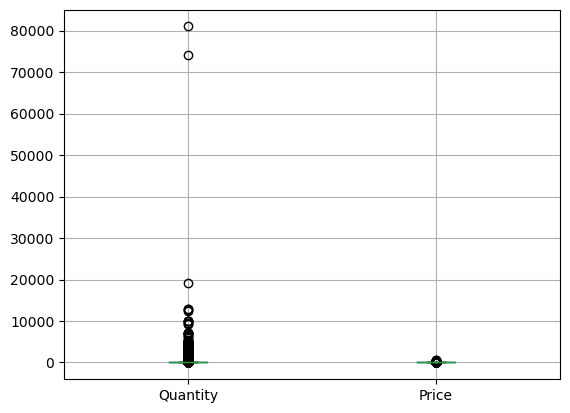

In [457]:
df[num_cols].boxplot()
plt.show()

The distributions are distorted by extreme values. Let’s cap the outliers and replot histograms for both features to observe the corrected distributions.

In [460]:
for col in num_cols:
    df[col] = df[col].clip(upper=df[col].quantile(0.99))

<Figure size 640x480 with 0 Axes>

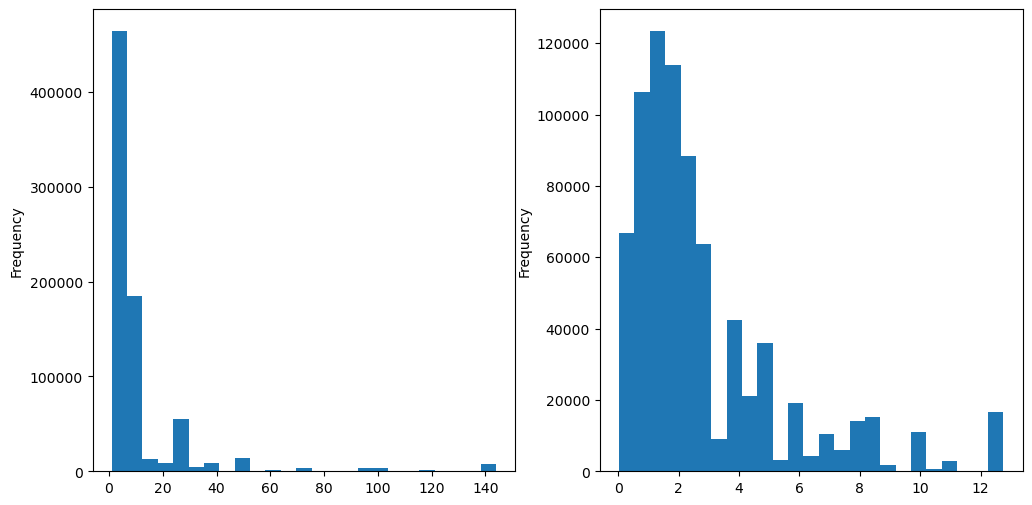

In [462]:
plt.clf()
plt.subplots(1,2, figsize = (12,6))

for i in [0,1]:
    plt.subplot(1,2, i + 1)
    df[num_cols[i]].plot(kind = 'hist', bins = 25)

plt.show()

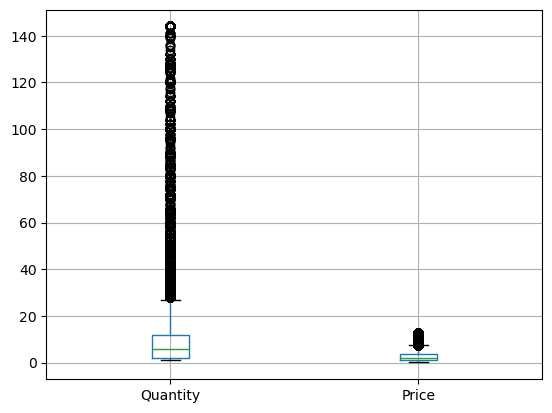

In [464]:
plt.clf()
df[num_cols].boxplot()

plt.show()

* The **distribution remains highly skewed**, indicating a few customers purchase far more than average.
* Even after capping, values cluster near the upper limit.
* These represent **genuine heavy buyers**, not anomalies -- so we **retain them as valid data**.

## 3. Feature Enineering

Create a new feature **`total_price`** = `Quantity × Price` to prepare for calculating the **Monetary** component of the RFM analysis.


In [469]:
df['total_price'] = df.Quantity * df.Price

Aggregate customer-level features directly from the cleaned dataset to summarize each client’s purchasing behavior.

In [513]:
customer_df = df.groupby('Customer ID').agg(
    frequency=('Invoice', 'nunique'),    # RFM Frequency
    monetary=('total_price', 'sum'),        # RFM Monetary
    total_quantity=('Quantity', 'sum'),     # Total items bought
    last_purchase=('InvoiceDate', 'max'),  # For Recency
).reset_index()
customer_df

,Customer ID,frequency,monetary,total_quantity,last_purchase
0,12346,3,319.12,168,2011-01-18 10:01:00
1,12347,8,4821.69,2871,2011-12-07 15:52:00
2,12348,5,1658.40,2704,2011-09-25 13:13:00
3,12349,3,3545.69,1621,2011-11-21 09:51:00
4,12350,1,294.40,196,2011-02-02 16:01:00
...,...,...,...,...,...
5847,18283,22,2655.75,1677,2011-12-06 12:02:00
5848,18284,1,411.68,493,2010-10-04 11:33:00
5849,18285,1,372.60,144,2010-02-17 10:24:00
5850,18286,2,1207.63,607,2010-08-20 11:57:00


In [515]:
# Add RFM Recency
import datetime as dt

snapshot_date = df['InvoiceDate'].max() + dt.timedelta(days=1)
customer_df['recency'] = (snapshot_date - customer_df['last_purchase']).dt.days

Since **Recency** has been derived, the intermediate `LastPurchase` column can be safely dropped.

In [518]:
# Drop last_purchase after calculating recency
customer_df.drop(columns = 'last_purchase', inplace = True)
customer_df

,Customer ID,frequency,monetary,total_quantity,recency
0,12346,3,319.12,168,326
1,12347,8,4821.69,2871,2
2,12348,5,1658.40,2704,75
3,12349,3,3545.69,1621,19
4,12350,1,294.40,196,310
...,...,...,...,...,...
5847,18283,22,2655.75,1677,4
5848,18284,1,411.68,493,432
5849,18285,1,372.60,144,661
5850,18286,2,1207.63,607,477


With the RFM features ready, enrich the dataset by adding additional behavioral customer attributes for deeper segmentation.

In [523]:
# Add Behavioral Features
customer_df['avg_busket_value'] = customer_df.monetary / customer_df.frequency
customer_df['avg_items_per_order'] = customer_df.total_quantity / customer_df.frequency
customer_df['avg_price_per_item'] = customer_df.monetary / customer_df.total_quantity

customer_df

,Customer ID,frequency,monetary,total_quantity,recency,avg_busket_value,avg_items_per_order,avg_price_per_item
0,12346,3,319.12,168,326,106.373333,56.000000,1.899524
1,12347,8,4821.69,2871,2,602.711250,358.875000,1.679446
2,12348,5,1658.40,2704,75,331.680000,540.800000,0.613314
3,12349,3,3545.69,1621,19,1181.896667,540.333333,2.187347
4,12350,1,294.40,196,310,294.400000,196.000000,1.502041
...,...,...,...,...,...,...,...,...
5847,18283,22,2655.75,1677,4,120.715909,76.227273,1.583631
5848,18284,1,411.68,493,432,411.680000,493.000000,0.835051
5849,18285,1,372.60,144,661,372.600000,144.000000,2.587500
5850,18286,2,1207.63,607,477,603.815000,303.500000,1.989506


Round all columns to improve numerical stability and ensure consistent precision across the dataset.

In [527]:
customer_df = customer_df.round(2)

customer_df.head(3)

,Customer ID,frequency,monetary,total_quantity,recency,avg_busket_value,avg_items_per_order,avg_price_per_item
0,12346,3,319.12,168,326,106.37,56.00,1.90
1,12347,8,4821.69,2871,2,602.71,358.88,1.68
2,12348,5,1658.40,2704,75,331.68,540.80,0.61


### 6. Handle Outliers in Aggregated Features

Inspect the aggregated dataset to identify any new outliers introduced during feature aggregation.

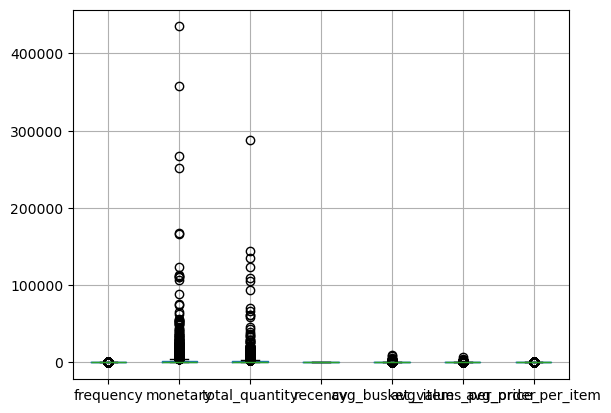

In [529]:
customer_df.boxplot()
plt.show()

All new features except `recency` are heavily skewed and contain extreme outliers -- therefore, **capping** is required.


In [532]:
cols = ['frequency', 'monetary', 'total_quantity', 'avg_busket_value', 'avg_items_per_order', 'avg_price_per_item']
for col in cols:
    q_99 = customer_df[col].quantile(0.99)
    customer_df[col] = customer_df[col].clip(upper = q_99)

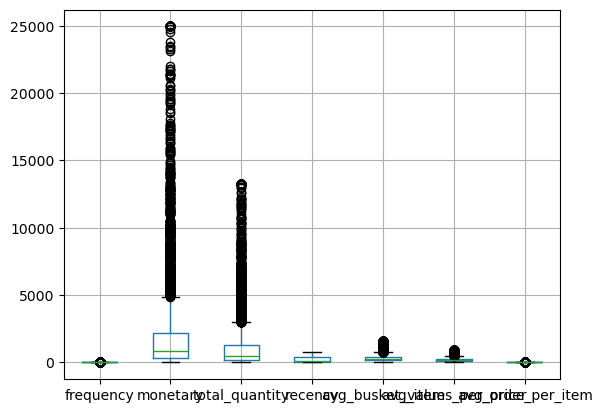

In [534]:
customer_df.boxplot()
plt.show()

## 4. Save Processed Data

Outliers are now controlled and no longer distort the data. The dataset is ready for analysis after scaling during the modeling stage.  

Before saving, drop the `Customer ID` column, as it’s no longer relevant.

In [538]:
customer_df.drop(columns = ['Customer ID'], inplace = True)

customer_df.head(1)

,frequency,monetary,total_quantity,recency,avg_busket_value,avg_items_per_order,avg_price_per_item
0,3,319.12,168.0,326,106.37,56.0,1.9


Save the dataset as a **.csv** file instead of **.parquet**, since it now contains only numeric features and no complex data types like `datetime`.

In [545]:
path = '../data/processed_customer_data.csv'
customer_df.to_csv('../data/processed_customer_data.csv')
print(f'File exported succesfully under {path}')

File exported succesfully under ../data/processed_customer_data.csv
